# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [3]:
# initializing Microscope simulation 
cell_library_folder_path = current_dir.joinpath('cell_library')
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation().initialize(cell_library_folder_path)

___

# Function to simulate cell positions

In [4]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 100
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation().generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
95,3364,2534,3402,2573,27,77,79,4262,144,37,11,0,0,72
96,2592,4602,2644,4643,27,105,82,6389,309,62,0,0,0,47
97,1988,1138,2036,1178,27,96,80,5405,129,0,0,0,0,18
98,3753,4098,3795,4148,27,84,100,6470,333,56,0,0,0,75
99,1082,2026,1135,2070,27,107,89,7632,479,88,0,0,0,85


# Generate simulation on demand

z-position:  7


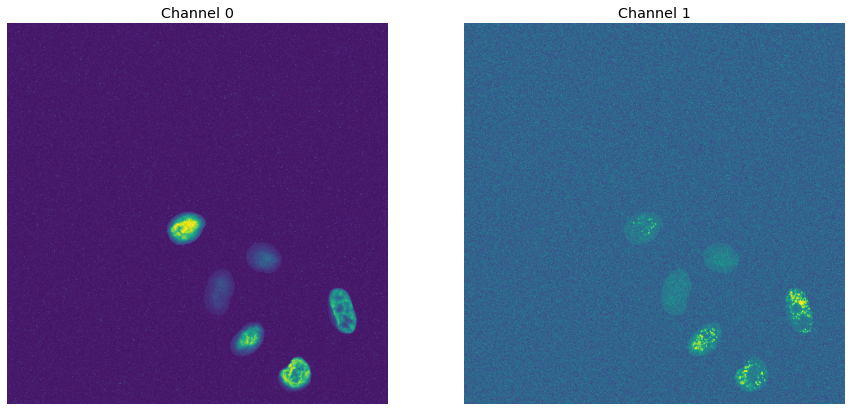

In [5]:
# Region to display
z_position = 7 #[-13:13]
y_position =  2000
x_position = 2000
x_size = 960
y_size = 960
simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)
# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
print('z-position: ', str(z_position))
for i in range (number_color_channels):
    #simulated_image_removed_extreme_values = simulated_image[:,:,i]#fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)

    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    #print('mean int ch: ',str(i),' ' , np.mean(simulated_image_removed_extreme_values))
plt.show()


## Image Processing

In [8]:
# Pipeline for image processing
dataframe = fa.PipelineFISH(
            image=simulated_image,
            channels_with_cytosol=None, 
            channels_with_nucleus=[0], 
            channels_with_FISH=[1],
            diameter_nucleus=80, 
            diameter_cytosol=0, 
            voxel_size_z=500,
            voxel_size_yx=130,
            file_name_str ='temp',
            psf_z=500,
            psf_yx=300,  
            show_plots=False,
            #folder_name='termi' 
            ).run()[0]


 Output folder name :  temp___nuc_80__cyto_0__psfz_500__psfyx_300__ts_None

 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   temp.tif
    Original Image Shape :                    [1, 960, 960, 2]
    Image sharpness metric :                  1.204
    Number of detected cells:                 6
    Intensity threshold for spot detection :  [25.0]
    Average detected spots per cell :         [13]
    Maximum detected spots per cell :         [39]
